<img src="img/TJI_logo_whitebg_440x220.jpg" alt="drawing" style="width: 220px;float: right"/>

# Analysis: Short Title
---

## Overview

One or two sentences describing the purpose of this analysis.

## Summary of findings
* Summarize your analysis with simple items listed here.
* Readers will still scroll to see your charts and code.

## Datasets used
* List all data.world datasets used in your analysis, like so:
* `tji/officer-involved-shooting/shot_civilians`

##### Author: Your Name (your@email.com)
---

## [ Begin with imports as usual ]

In [1]:
import datadotworld as dw
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline

%load_ext watermark
%watermark -a 'Everett Wetchler' -d -t -z -w -p numpy,pandas,matplotlib,seaborn,datadotworld

Everett Wetchler 2018-05-31 09:44:12 PDT

numpy 1.14.3
pandas 0.20.1
matplotlib 2.2.0
seaborn 0.7.1
datadotworld 1.6.0
watermark 1.5.0


In [2]:
from lib.utils import *
from lib.style import *

plotsaver = PlotSaver('../plots', 'odmp', numbering=False, dpi=300)

Removing 2 past plots


In [3]:
DATE_FMT = '%Y-%m-%d'

datasets = dw.load_dataset('tji/auxiliary-datasets', force_update=True)
odmp = datasets.dataframes['odmp_texas_line_of_duty_deaths']
print("ODMP data read for %d officers, %s to %s" % (
    len(odmp), odmp.date_of_death.min().strftime(DATE_FMT), odmp.date_of_death.max().strftime(DATE_FMT)))

ODMP data read for 1588 officers, 1840-03-19 to 2018-08-09


In [4]:
odmp.groupby(odmp.date_of_death.dt.year).size().iloc[-10:]

date_of_death
2009    11
2010    18
2011    13
2012    11
2013    13
2014    11
2015    12
2016    19
2017    11
2018     4
dtype: int64

In [5]:
odmp.head()

,date_of_death,officer_name,agency_name,cause_of_death,agency_county
0,1892-12-19,JAMES B STEVENS,WISE CO CONST PCT 2,GUNFIRE,WISE
1,1840-03-19,JOSEPH L HOOD,BEXAR CO SHERIFFS OFFICE,STABBED,BEXAR
2,1858-01-09,SAMUEL LEE LOCKHART,LLANO CO SHERIFFS OFFICE,STABBED,LLANO
3,1860-02-19,THOMAS S MILLIGAN,MASON CO SHERIFFS OFFICE,ASSAULT,MASON
4,1861-08-24,JOHN B YORK,TARRANT CO SHERIFFS OFFICE,STABBED,TARRANT


In [6]:
odmp.notnull().mean()

date_of_death     1.0
officer_name      1.0
agency_name       1.0
cause_of_death    1.0
agency_county     1.0
dtype: float64

In [7]:
odmp.cause_of_death.value_counts()

GUNFIRE                     869
AUTOMOBILE CRASH            166
VEHICULAR ASSAULT            75
MOTORCYCLE CRASH             75
HEART ATTACK                 67
STRUCK BY VEHICLE            63
GUNFIRE (ACCIDENTAL)         56
VEHICLE PURSUIT              48
STABBED                      43
ASSAULT                      34
DROWNED                      15
STRUCK BY TRAIN              15
AIRCRAFT ACCIDENT            13
DUTY RELATED ILLNESS          9
WEATHER/NATURAL DISASTER      9
FALL                          8
ACCIDENTAL                    5
ANIMAL RELATED                4
EXPOSURE (TOXINS)             3
FIRE                          2
STRUCK BY STREETCAR           2
EXPLOSION                     2
STRUCTURE COLLAPSE            1
ELECTROCUTED                  1
TRAINING ACCIDENT             1
EXPOSURE (COLD)               1
TRAIN ACCIDENT                1
Name: cause_of_death, dtype: int64

In [8]:
VEHICLE = 'VEHICLE CRASH'
MEDICAL = 'MEDICAL'
ACCIDENT = 'ACCIDENT'
ASSAULT = 'STABBING/ASSAULT'
renamings = {
  'GUNFIRE': 'GUNFIRE',
  'AUTOMOBILE CRASH': VEHICLE,
  'MOTORCYCLE CRASH': VEHICLE,
  'VEHICULAR ASSAULT': ASSAULT,
  'HEART ATTACK': MEDICAL,
  'STRUCK BY VEHICLE': VEHICLE,
  'GUNFIRE (ACCIDENTAL)': ACCIDENT,
  'VEHICLE PURSUIT': VEHICLE,
  'STABBED': ASSAULT,
  'ASSAULT': ASSAULT,
  'DROWNED': ACCIDENT,
  'STRUCK BY TRAIN': ACCIDENT,
  'AIRCRAFT ACCIDENT': ACCIDENT,
  'DUTY RELATED ILLNESS': MEDICAL,
  'WEATHER/NATURAL DISASTER': ACCIDENT,
  'FALL': ACCIDENT,
  'ACCIDENTAL': ACCIDENT,
  'STRUCK BY STREETCAR': ACCIDENT,
  'EXPOSURE (COLD)': ACCIDENT,
  'TRAINING ACCIDENT': ACCIDENT,
  'TRAIN ACCIDENT': ACCIDENT,
  'STRUCTURE COLLAPSE': ACCIDENT,
}
odmp['cause_of_death'] = odmp.cause_of_death.apply(lambda cod: renamings.get(cod, 'OTHER'))

In [9]:
odmp['cause_of_death'].value_counts()

GUNFIRE             869
VEHICLE CRASH       352
STABBING/ASSAULT    152
ACCIDENT            127
MEDICAL              76
OTHER                12
Name: cause_of_death, dtype: int64

Saving plot to ../plots/odmp_all.png


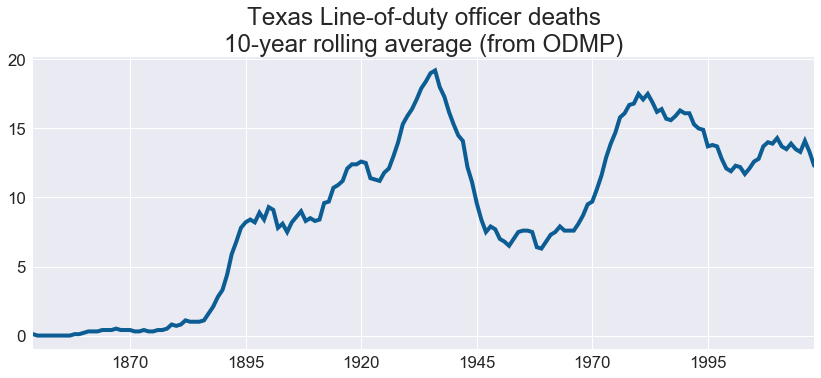

In [14]:
fig, ax = plt.subplots(1)
fig.set_size_inches(14, 6)
s = odmp.set_index('date_of_death').sort_index().resample('AS').size().rolling(10).mean()
s.plot(ax=ax)
ax.set_xlim(s.dropna().index.min(), ax.get_xlim()[1])
ax.set_yticks(np.arange(0, ax.get_ylim()[1], 5))
ax.set_title('Texas Line-of-duty officer deaths\n10-year rolling average (from ODMP)')
plt.subplots_adjust(top=0.8)
ax.set_xlabel('')
plotsaver.saveplot(fig, 'all')

Saving plot to ../plots/odmp_by_cause_of_death.png


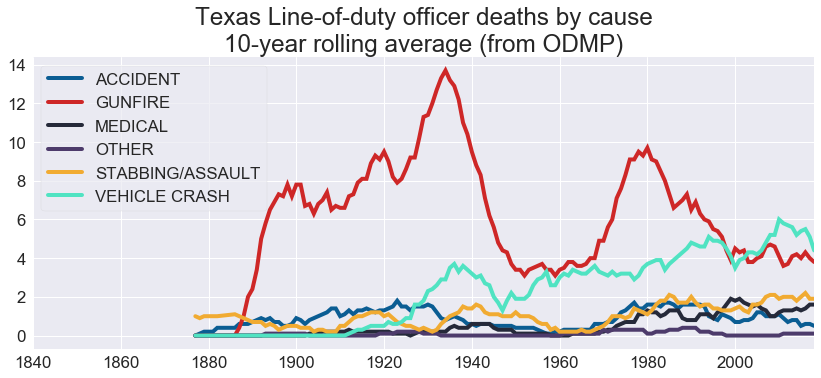

In [13]:
fig, ax = plt.subplots(1)
fig.set_size_inches(14, 6)

frame = odmp.groupby(['cause_of_death', odmp.date_of_death.dt.year]).size().unstack().T.fillna(0)
frame.rolling(10).mean().plot(ax=ax)
ax.set_title('Texas Line-of-duty officer deaths by cause\n10-year rolling average (from ODMP)')
ax.set_xlim(frame.dropna().index.min(), ax.get_xlim()[1])
ax.legend(loc='upper left', title='')
plt.subplots_adjust(top=0.8)
ax.set_xlabel('')
plotsaver.saveplot(fig, 'by_cause_of_death')

Saving plot to ../plots/odmp_by_cause_since_2005.png


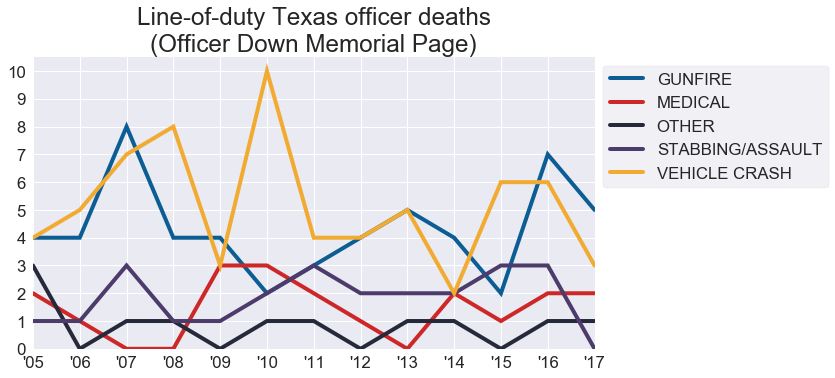

In [31]:
fig, ax = plt.subplots(1)
fig.set_size_inches(12, 6)

frame = odmp.groupby(['cause_of_death', odmp.date_of_death.dt.year]).size().unstack().T.fillna(0)
frame['OTHER'] += frame['ACCIDENT']
frame.drop('ACCIDENT', axis=1, inplace=True)
frame.loc[2005:2017].plot(ax=ax)
ax.set_title('Line-of-duty Texas officer deaths\n(Officer Down Memorial Page)')
ax.set_xticks(list(range(2005, 2018)))
ax.set_yticks(list(range(0, int(ax.get_ylim()[1]) + 1)))
ax.set_ylim(0, ax.get_ylim()[1])
ax.legend(loc='upper left', title='')
plt.subplots_adjust(top=0.8, right=0.7, left=0.05)
ax.set_xlabel('')
ax.legend(loc='upper left', bbox_to_anchor=(1,1))
shortyear_xticks(ax)
plotsaver.saveplot(fig, 'by_cause_since_2005', dpi=300)